# TensorFlow基础

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

AssertionError: Not enough GPU hardware devices available

## 数据类型

### 数值类型

标量在 TensorFlow 是如何创建的

In [2]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [3]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [5]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [6]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [7]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>,
 TensorShape([2, 2]))

三维张量可以定义为：

In [8]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=int32)>

通过传入字符串对象即可创建字符串类型的张量

In [9]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [11]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [12]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [13]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [14]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [15]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [16]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [17]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [18]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [19]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [20]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [21]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [22]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0], dtype=int32)>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [23]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [24]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [25]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [26]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [27]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [28]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [29]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [30]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [31]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [32]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [33]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [34]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [35]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1], dtype=int32)>

In [36]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]], dtype=int32)>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [37]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.48736426,  0.645211  ],
       [-0.12243642,  0.4127124 ]], dtype=float32)>

In [38]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.24305683,  0.4351629 ],
       [ 3.4091017 , -3.9571514 ]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [39]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.6089263 , 0.9299811 ],
       [0.87149775, 0.12173331],
       [0.66958237, 0.80959904]], dtype=float32)>

In [40]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3821423 , 8.786899  ],
       [0.78760266, 2.5676322 ]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [41]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, 42],
       [ 5, 31]], dtype=int32)>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [42]:
# 0~10，不包含 10"
tf.range(10) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [43]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

In [44]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9], dtype=int32)>

## 张量的典型应用

### 标量

In [45]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.3705839, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 我们创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [46]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.3556794 , -0.83190244],
       [-1.89884   , -0.530538  ],
       [-0.38140687, -2.3746252 ],
       [ 0.972968  ,  0.8480576 ]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [47]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [48]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b 
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-1.1242722, -1.1242722, -1.1242722],
       [ 1.3703425,  1.3703425,  1.3703425]], dtype=float32)>

In [49]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.28908986, -0.6751812 ,  0.32318032],
       [ 0.48651385, -0.42769876, -0.2652958 ],
       [ 0.6118082 , -0.37406206,  0.6344675 ],
       [ 0.71607816, -0.07635009, -0.1615203 ]], dtype=float32)>

### 三维张量

In [50]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [51]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 69664113be75683a8fe16e3ed0ab59fda8886cb3cd7ada244f7d9544e4676b9f so we will re-download the data.
17465344/17464789 [==============================] - 10s 1us/step


(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

我们通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [52]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [53]:
# 创建 32x32 的彩色图片输入，个数为 4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 

TensorShape([4, 30, 30, 16])

In [54]:
# 访问卷积核张量
layer.kernel.shape 

TensorShape([3, 3, 3, 16])

## 索引与切片
### 索引

In [55]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [56]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 7.4660081e-01, -1.1094991e+00, -3.2261707e-02],
        [-1.0461559e+00,  8.8454258e-01,  2.2186189e+00],
        [ 6.8198425e-01,  1.2603869e-01, -8.6598372e-01],
        ...,
        [-3.8362366e-01, -1.5416192e-01,  8.2705820e-01],
        [ 4.7519851e-01, -1.0252391e+00,  9.4629353e-01],
        [-9.7652981e-03, -7.8386223e-01,  1.2128164e+00]],

       [[-9.0167129e-01, -2.0572738e-01,  9.0411580e-01],
        [-1.8202323e-01,  7.7934104e-01, -1.3951445e-01],
        [ 5.3466493e-01,  5.2313799e-01,  1.0881571e+00],
        ...,
        [ 1.9915401e+00,  9.8662215e-01, -2.3829716e-01],
        [-4.5485920e-01,  7.9347795e-01,  8.0360961e-01],
        [ 6.0904812e-02,  7.8732967e-01, -1.0572485e+00]],

       [[-1.2777422e-01,  4.7567341e-01,  1.7965610e+00],
        [-1.3153278e+00,  2.0452678e+00, -4.4767901e-01],
        [-1.1307126e+00,  1.0279242e+00, -9.6881622e-01],
        ...,
        [-2.2218683e-01,  5.836438

In [57]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-0.9016713 , -0.20572738,  0.9041158 ],
       [-0.18202323,  0.77934104, -0.13951445],
       [ 0.5346649 ,  0.523138  ,  1.088157  ],
       [ 0.2100436 ,  0.30272606,  1.100766  ],
       [-0.32234076, -0.34431747,  0.77528363],
       [ 0.16564019, -0.50374323,  0.28424522],
       [-1.015189  ,  1.8531388 ,  0.14593253],
       [-0.03974164,  0.29721963,  0.5245213 ],
       [-1.0736302 ,  2.2461    ,  1.9197271 ],
       [ 0.63502795,  1.263226  ,  0.430934  ],
       [ 0.74771607,  0.7304392 ,  0.85152775],
       [-0.98306036,  0.55333596,  0.07340608],
       [ 0.19449686,  1.1404476 , -2.5735798 ],
       [ 1.3443837 ,  0.3320094 , -0.62102854],
       [-0.58113956, -0.17200172,  0.24772796],
       [ 1.5520612 ,  0.681254  ,  0.84012115],
       [ 0.4892813 , -1.8741418 , -0.6773926 ],
       [ 0.39462358, -1.1309992 ,  0.26329702],
       [-1.7057981 ,  1.2765083 ,  0.42495438],
       [ 0.45869616, -0.60959345,  0.59

In [58]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5346649, 0.523138 , 1.088157 ], dtype=float32)>

In [59]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.5372153>

In [60]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.7395669 ,  0.08174109,  2.1108642 ], dtype=float32)>

### 切片

In [61]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.83964074,  0.16926038,  0.49103218],
         [-0.06293206, -0.6084627 ,  1.2407821 ],
         [ 0.27511042, -1.731632  , -0.7406514 ],
         ...,
         [ 1.9090644 ,  0.38838777,  0.5765771 ],
         [ 0.28803632, -0.36727467, -1.5029193 ],
         [ 1.7465843 ,  1.1579893 ,  0.36262763]],

        [[-0.4124433 ,  0.32254592, -0.06259218],
         [ 0.3575821 , -0.16755113,  1.2433666 ],
         [-0.9442305 , -0.7394359 ,  1.4134613 ],
         ...,
         [ 0.03463046,  0.17558552, -0.96277595],
         [-0.11823523, -2.404161  ,  0.5449985 ],
         [ 1.0442868 , -1.2007551 , -1.036428  ]],

        [[ 0.736233  ,  0.23295237, -0.5909583 ],
         [ 0.37211835, -0.23711923, -0.40799135],
         [-1.469638  ,  1.1085545 ,  1.4508802 ],
         ...,
         [-0.09860534,  0.12423477,  0.9709484 ],
         [ 0.20418826,  1.1205236 , -0.577874  ],
         [-0.42192557,  0.75519806,  0.11271394]

In [62]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 7.4660081e-01, -1.1094991e+00, -3.2261707e-02],
        [-1.0461559e+00,  8.8454258e-01,  2.2186189e+00],
        [ 6.8198425e-01,  1.2603869e-01, -8.6598372e-01],
        ...,
        [-3.8362366e-01, -1.5416192e-01,  8.2705820e-01],
        [ 4.7519851e-01, -1.0252391e+00,  9.4629353e-01],
        [-9.7652981e-03, -7.8386223e-01,  1.2128164e+00]],

       [[-9.0167129e-01, -2.0572738e-01,  9.0411580e-01],
        [-1.8202323e-01,  7.7934104e-01, -1.3951445e-01],
        [ 5.3466493e-01,  5.2313799e-01,  1.0881571e+00],
        ...,
        [ 1.9915401e+00,  9.8662215e-01, -2.3829716e-01],
        [-4.5485920e-01,  7.9347795e-01,  8.0360961e-01],
        [ 6.0904812e-02,  7.8732967e-01, -1.0572485e+00]],

       [[-1.2777422e-01,  4.7567341e-01,  1.7965610e+00],
        [-1.3153278e+00,  2.0452678e+00, -4.4767901e-01],
        [-1.1307126e+00,  1.0279242e+00, -9.6881622e-01],
        ...,
        [-2.2218683e-01,  5.836438

In [63]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[ 7.46600807e-01, -1.10949910e+00, -3.22617069e-02],
         [ 6.81984246e-01,  1.26038685e-01, -8.65983725e-01],
         [-9.69614983e-01, -2.35127136e-01, -6.32176280e-01],
         ...,
         [-1.23284566e+00,  6.24978423e-01,  5.97940087e-01],
         [ 5.41275561e-01,  8.50891888e-01, -1.91968942e+00],
         [-9.90986049e-01,  7.56506503e-01, -3.73492330e-01]],

        [[-1.27774224e-01,  4.75673407e-01,  1.79656100e+00],
         [-1.13071263e+00,  1.02792418e+00, -9.68816221e-01],
         [-8.50593150e-01, -9.52534437e-01, -5.50044000e-01],
         ...,
         [ 2.96977115e+00,  1.20062813e-01,  3.86219211e-02],
         [ 1.60874784e+00,  3.39597762e-01, -9.82060850e-01],
         [-7.85237551e-01, -9.61406410e-01, -6.08708382e-01]],

        [[ 4.39234048e-01, -4.03915882e-01,  2.17007712e-01],
         [-2.34071031e-01, -7.94721782e-01, -1.83111513e+00],
         [-1.71956527e+00,  1.63803592e-01, 

In [64]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int32)>

In [65]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int32)>

In [66]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0], dtype=int32)>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [67]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[ 2.85468668e-01,  1.59129727e+00,  7.33585417e-01],
        [ 6.16496384e-01,  3.38066757e-01, -1.43302158e-01],
        [ 1.46004248e+00,  1.43982708e-01, -1.42035973e+00],
        [-9.25312102e-01, -3.94549109e-02, -4.11549449e-01],
        [ 5.49991764e-02, -9.78930175e-01,  1.30186871e-01],
        [-1.14536619e+00,  4.69457626e-01, -4.42570448e-01],
        [-2.06081327e-02, -9.94908959e-02,  9.30824637e-01],
        [ 2.91240096e-01,  2.10986331e-01,  1.13004434e+00],
        [ 2.33501577e+00,  3.87691587e-01, -6.49660230e-01],
        [ 7.22681463e-01, -8.27120721e-01,  1.48891604e+00],
        [ 7.96569347e-01,  3.85602534e-01, -7.71942362e-02],
        [ 2.21812105e+00, -1.08925235e+00,  3.03746045e-01],
        [ 2.06081152e+00,  5.95780611e-01,  1.43985128e+00],
        [-4.67588276e-01, -9.53786895e-02, -7.80910373e-01],
        [-9.36360836e-01, -1.63321888e+00, -5.93927920e-01],
        [-1.33183134e+00, -8.621

In [68]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[ 2.3974035e+00, -5.7536173e-01, -3.0555096e-01, ...,
         -2.5179312e-01, -9.0532327e-01, -1.7765080e+00],
        [ 1.8117288e+00, -4.5347640e-01,  5.4488367e-01, ...,
         -9.3009222e-01,  2.6678589e-01, -6.1634487e-01],
        [ 8.7489015e-01,  2.6961789e-01,  8.0154228e-01, ...,
          7.3231244e-01,  9.2714804e-01,  1.7077270e+00],
        ...,
        [ 5.5621761e-01, -5.3076416e-01, -3.9724773e-01, ...,
         -1.5956060e+00,  5.4800725e-01,  8.1705946e-01],
        [-1.7468108e+00,  6.4293653e-01,  4.1986331e-01, ...,
         -7.1470225e-01,  4.5110995e-01,  1.6518049e+00],
        [ 1.4909361e-01, -8.6216176e-01,  7.6210618e-01, ...,
          3.3806676e-01,  7.2723097e-01,  1.5912973e+00]],

       [[ 1.1817775e-01, -5.6356090e-01, -9.2209619e-01, ...,
         -1.3788380e-01,  1.4811445e+00,  4.1756611e-02],
        [-2.6017490e-01, -3.3882132e-01,  6.4372939e-01, ...,
          7.6154268e-01,  2.41

In [69]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[ 2.3974035 , -0.79786247],
         [-0.5753617 , -1.6149422 ],
         [-0.30555096,  1.0897659 ],
         ...,
         [-0.25179312,  0.09448314],
         [-0.90532327, -1.3662018 ],
         [-1.776508  ,  0.5103862 ]],

        [[ 1.8117288 , -0.66141796],
         [-0.4534764 ,  0.36047283],
         [ 0.54488367, -1.4706944 ],
         ...,
         [-0.9300922 , -0.40194476],
         [ 0.2667859 , -1.0951092 ],
         [-0.61634487, -0.19304866]],

        [[ 0.87489015,  0.9438022 ],
         [ 0.2696179 ,  0.11882564],
         [ 0.8015423 , -0.94609094],
         ...,
         [ 0.73231244, -0.13912751],
         [ 0.92714804,  2.41525   ],
         [ 1.707727  , -0.6999736 ]],

        ...,

        [[ 0.5562176 , -0.03823125],
         [-0.53076416,  0.05232186],
         [-0.39724773,  1.7282252 ],
         ...,
         [-1.595606  , -0.61250764],
         [ 0.54800725,  1.0931596 ],
         [ 0.8170

In [70]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-9.13613081e-01,  7.17479110e-01,  3.73870209e-02],
         [-3.07218194e-01, -3.37995414e-04, -3.08630913e-01],
         [-1.90238237e+00,  1.72683612e-01,  6.54973447e-01],
         ...,
         [-9.13444519e-01, -9.04823691e-02,  3.54621768e-01],
         [ 1.02231157e+00, -1.78067058e-01, -3.72424841e-01],
         [ 1.37622726e+00, -1.13627100e+00,  1.85540903e+00]],

        [[ 1.01813233e+00, -8.84221435e-01,  6.59429014e-01],
         [ 1.31327248e+00,  4.59996462e-01,  1.00966346e+00],
         [-1.09486020e+00, -5.07811725e-01,  6.95570409e-01],
         ...,
         [ 7.68788934e-01, -2.24946573e-01,  4.27832127e-01],
         [ 2.59618044e-01,  7.13136375e-01,  9.17297721e-01],
         [-2.58289754e-01, -1.46871054e+00, -5.84204853e-01]],

        [[ 1.42613232e+00, -2.36690789e-02,  6.83636844e-01],
         [ 9.90050361e-02, -1.26561999e-01, -3.87081146e-01],
         [-1.17397869e+00,  2.89804135e-02, 

In [71]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[ 4.6494487e-01,  2.3974035e+00],
         [-7.6724207e-01, -5.7536173e-01],
         [-6.3064986e-01, -3.0555096e-01],
         ...,
         [ 2.0730615e+00, -2.5179312e-01],
         [-3.3985403e-01, -9.0532327e-01],
         [-1.0563951e+00, -1.7765080e+00]],

        [[ 9.7876000e-01,  1.8117288e+00],
         [ 1.2828418e+00, -4.5347640e-01],
         [-6.5281451e-01,  5.4488367e-01],
         ...,
         [-1.0053632e+00, -9.3009222e-01],
         [ 1.4615265e+00,  2.6678589e-01],
         [ 1.3942121e+00, -6.1634487e-01]],

        [[-7.3425102e-01,  8.7489015e-01],
         [ 8.7234581e-01,  2.6961789e-01],
         [-1.1001766e+00,  8.0154228e-01],
         ...,
         [ 1.3037899e+00,  7.3231244e-01],
         [-1.1149278e-01,  9.2714804e-01],
         [-1.6617715e+00,  1.7077270e+00]],

        ...,

        [[ 1.0864844e+00,  5.5621761e-01],
         [-1.4636632e+00, -5.3076416e-01],
         [-3.7740993e-

## 维度变换

### 改变视图

In [72]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]], dtype=int32)>

### 改变视图

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [73]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]], dtype=int32)>

In [74]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [75]:
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]],
      dtype=int32)>

In [76]:
 tf.reshape(x,[2,4,12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]], dtype=int32)>

In [77]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]], dtype=int32)>

### 增、删维度

In [78]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[1, 8, 5, 8, 3, 7, 5, 4, 0, 4, 3, 8, 6, 3, 4, 6, 0, 0, 8, 7, 1, 7,
        3, 1, 3, 6, 0, 0],
       [6, 8, 8, 0, 4, 6, 3, 2, 7, 3, 8, 1, 6, 9, 5, 6, 9, 4, 2, 1, 6, 9,
        3, 1, 7, 9, 2, 8],
       [9, 9, 3, 0, 6, 6, 7, 2, 9, 7, 6, 1, 0, 2, 7, 2, 0, 9, 1, 4, 2, 3,
        5, 3, 9, 1, 8, 4],
       [7, 5, 9, 9, 3, 0, 7, 6, 8, 7, 2, 2, 0, 1, 4, 3, 2, 1, 2, 7, 2, 6,
        0, 9, 8, 9, 8, 7],
       [8, 0, 8, 0, 4, 6, 5, 3, 6, 6, 9, 2, 9, 0, 8, 0, 8, 6, 4, 4, 4, 1,
        8, 8, 0, 5, 3, 8],
       [5, 1, 3, 7, 6, 4, 3, 3, 9, 7, 3, 0, 9, 4, 0, 9, 7, 8, 9, 5, 0, 6,
        1, 9, 4, 0, 9, 6],
       [2, 2, 5, 1, 2, 1, 4, 4, 3, 4, 7, 6, 9, 6, 2, 1, 2, 0, 1, 5, 0, 7,
        0, 5, 3, 5, 6, 6],
       [1, 9, 6, 6, 3, 8, 5, 0, 8, 8, 4, 0, 1, 8, 7, 4, 6, 9, 7, 9, 2, 7,
        5, 3, 5, 3, 9, 3],
       [4, 9, 1, 5, 0, 3, 4, 3, 4, 7, 6, 9, 3, 1, 0, 1, 3, 8, 9, 2, 0, 7,
        4, 0, 4, 2, 0, 2],
       [8, 3, 5, 7, 0, 9, 8, 5, 5, 9, 5, 4,

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [79]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[1],
        [8],
        [5],
        [8],
        [3],
        [7],
        [5],
        [4],
        [0],
        [4],
        [3],
        [8],
        [6],
        [3],
        [4],
        [6],
        [0],
        [0],
        [8],
        [7],
        [1],
        [7],
        [3],
        [1],
        [3],
        [6],
        [0],
        [0]],

       [[6],
        [8],
        [8],
        [0],
        [4],
        [6],
        [3],
        [2],
        [7],
        [3],
        [8],
        [1],
        [6],
        [9],
        [5],
        [6],
        [9],
        [4],
        [2],
        [1],
        [6],
        [9],
        [3],
        [1],
        [7],
        [9],
        [2],
        [8]],

       [[9],
        [9],
        [3],
        [0],
        [6],
        [6],
        [7],
        [2],
        [9],
        [7],
        [6],
        [1],
        [0],
        [2],
        [7],
        [2],
        [

In [80]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[1],
         [8],
         [5],
         [8],
         [3],
         [7],
         [5],
         [4],
         [0],
         [4],
         [3],
         [8],
         [6],
         [3],
         [4],
         [6],
         [0],
         [0],
         [8],
         [7],
         [1],
         [7],
         [3],
         [1],
         [3],
         [6],
         [0],
         [0]],

        [[6],
         [8],
         [8],
         [0],
         [4],
         [6],
         [3],
         [2],
         [7],
         [3],
         [8],
         [1],
         [6],
         [9],
         [5],
         [6],
         [9],
         [4],
         [2],
         [1],
         [6],
         [9],
         [3],
         [1],
         [7],
         [9],
         [2],
         [8]],

        [[9],
         [9],
         [3],
         [0],
         [6],
         [6],
         [7],
         [2],
         [9],
         [7],
         [6],
    

In [81]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[1],
        [8],
        [5],
        [8],
        [3],
        [7],
        [5],
        [4],
        [0],
        [4],
        [3],
        [8],
        [6],
        [3],
        [4],
        [6],
        [0],
        [0],
        [8],
        [7],
        [1],
        [7],
        [3],
        [1],
        [3],
        [6],
        [0],
        [0]],

       [[6],
        [8],
        [8],
        [0],
        [4],
        [6],
        [3],
        [2],
        [7],
        [3],
        [8],
        [1],
        [6],
        [9],
        [5],
        [6],
        [9],
        [4],
        [2],
        [1],
        [6],
        [9],
        [3],
        [1],
        [7],
        [9],
        [2],
        [8]],

       [[9],
        [9],
        [3],
        [0],
        [6],
        [6],
        [7],
        [2],
        [9],
        [7],
        [6],
        [1],
        [0],
        [2],
        [7],
        [2],
        [

In [82]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[5, 6, 8, 6, 1, 3, 5, 0, 6, 0, 8, 3, 7, 9, 9, 9, 8, 8, 3, 8, 5, 8,
        0, 8, 8, 9, 7, 9],
       [3, 9, 8, 0, 8, 7, 9, 5, 9, 7, 8, 4, 9, 4, 4, 9, 2, 9, 9, 7, 7, 2,
        6, 6, 6, 9, 1, 6],
       [6, 0, 0, 1, 5, 1, 6, 2, 8, 0, 6, 2, 7, 1, 8, 1, 3, 0, 0, 6, 3, 1,
        3, 0, 5, 8, 5, 2],
       [0, 8, 5, 2, 7, 3, 0, 3, 5, 0, 1, 2, 5, 6, 3, 0, 6, 2, 7, 6, 4, 7,
        5, 9, 1, 7, 2, 6],
       [4, 1, 3, 2, 6, 2, 9, 9, 7, 3, 8, 7, 0, 6, 5, 4, 9, 1, 7, 5, 2, 6,
        2, 2, 6, 2, 9, 1],
       [9, 0, 0, 4, 0, 2, 3, 9, 2, 9, 0, 0, 4, 5, 4, 5, 2, 1, 6, 7, 8, 6,
        6, 6, 0, 7, 6, 5],
       [9, 9, 2, 7, 7, 9, 1, 1, 0, 1, 2, 0, 9, 9, 7, 0, 1, 3, 4, 3, 5, 8,
        7, 7, 1, 5, 0, 4],
       [4, 0, 8, 5, 4, 2, 6, 6, 8, 4, 9, 8, 6, 2, 8, 4, 1, 4, 0, 0, 5, 5,
        8, 0, 4, 7, 6, 3],
       [2, 6, 7, 7, 3, 8, 4, 2, 4, 5, 2, 2, 8, 6, 8, 3, 9, 9, 2, 8, 0, 0,
        6, 3, 8, 9, 1, 5],
       [9, 9, 0, 6, 9, 2, 9, 2, 4, 5, 6, 2,

### 交换维度

In [83]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 1.75848174e+00, -9.49276313e-02,  4.18128610e-01, ...,
           7.55211771e-01, -6.08125746e-01, -7.41051137e-02],
         [-8.39346766e-01,  5.04880190e-01,  6.46030903e-01, ...,
          -5.80298066e-01, -9.05375302e-01,  1.93253368e-01],
         [ 1.44797933e+00,  1.63874328e+00,  1.34039545e+00, ...,
           1.53669918e+00, -1.16176987e+00,  3.42888206e-01],
         ...,
         [ 4.70202655e-01,  2.91220009e-01,  3.63497496e-01, ...,
           1.44786954e+00, -2.87226051e-01, -1.07121050e+00],
         [-5.20772696e-01, -2.05923855e-01,  1.36078072e+00, ...,
           2.60087281e-01, -2.89187461e-01,  8.51971865e-01],
         [-1.86519837e+00, -1.36792231e+00,  5.28671205e-01, ...,
          -4.27091807e-01, -3.50412160e-01, -3.88115913e-01]],

        [[ 1.30006146e+00, -3.03867960e+00, -3.40789151e+00, ...,
          -1.42247751e-01, -8.35458040e-01,  1.42847061e+00],
         [ 7.66256601e-02,  2.50

In [84]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.45285293, -1.5476533 ,  0.537544  ],
         [-0.08018557, -0.47030827, -0.5807823 ],
         [-0.7348387 ,  0.24642316, -1.6786592 ],
         ...,
         [ 0.3385515 , -0.20547317,  0.19310091],
         [ 0.66155654, -0.46558714,  0.7291675 ],
         [ 2.2670877 ,  0.7127913 ,  0.5712404 ]],

        [[ 1.5500336 , -0.05549447, -1.0149662 ],
         [ 0.0836934 ,  1.5134174 ,  1.3010902 ],
         [ 1.158296  ,  0.9432735 ,  0.86888915],
         ...,
         [ 2.299208  ,  0.8821764 , -1.1812357 ],
         [-1.3336568 , -0.29833916, -0.679004  ],
         [-0.96075   , -0.06259582, -0.46350768]],

        [[ 0.6465145 , -0.1779662 , -1.158539  ],
         [-1.3880632 , -1.2176616 , -2.1913621 ],
         [ 0.07833112, -2.5751643 , -1.8983381 ],
         ...,
         [-1.152619  ,  0.64713204,  0.7577758 ],
         [-0.5307071 , -0.6682429 ,  0.53394425],
         [-0.15840177,  2.211185  ,  1.9011275 ]

### 复制数据

In [85]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]], dtype=int32)>

In [86]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]], dtype=int32)>

In [87]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

In [88]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

In [89]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

## Broadcasting

In [90]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.06224814, -0.06224814, -0.06224814],
         [-0.60080034, -0.60080034, -0.60080034],
         [ 0.3785028 ,  0.3785028 ,  0.3785028 ],
         ...,
         [ 1.2839965 ,  1.2839965 ,  1.2839965 ],
         [ 0.20479114,  0.20479114,  0.20479114],
         [-2.146369  , -2.146369  , -2.146369  ]],

        [[-0.06224814, -0.06224814, -0.06224814],
         [-0.60080034, -0.60080034, -0.60080034],
         [ 0.3785028 ,  0.3785028 ,  0.3785028 ],
         ...,
         [ 1.2839965 ,  1.2839965 ,  1.2839965 ],
         [ 0.20479114,  0.20479114,  0.20479114],
         [-2.146369  , -2.146369  , -2.146369  ]],

        [[-0.06224814, -0.06224814, -0.06224814],
         [-0.60080034, -0.60080034, -0.60080034],
         [ 0.3785028 ,  0.3785028 ,  0.3785028 ],
         ...,
         [ 1.2839965 ,  1.2839965 ,  1.2839965 ],
         [ 0.20479114,  0.20479114,  0.20479114],
         [-2.146369  , -2.146369  , -2.146369  ]

In [91]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [92]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2], dtype=int32)>

In [93]:
# 余除运算
a%b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0], dtype=int32)>

### 乘方运算

In [94]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27], dtype=int32)>

In [95]:
# 乘方运算符
x**2 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9], dtype=int32)>

In [96]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [97]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [98]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

### 指数和对数运算

In [99]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [100]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [101]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [102]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [103]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[ 5.71998930e+00,  6.48220205e+00],
         [ 4.75584507e-01, -6.12748146e+00],
         [-5.37243700e+00, -1.12457619e+01],
         [ 1.84064412e+00,  9.60878015e-01],
         [-1.53321028e+00, -9.34617043e-01],
         [-3.98475313e+00, -3.60359836e+00],
         [ 3.62667155e+00, -4.38184381e-01],
         [-6.81609058e+00,  3.67464972e+00],
         [-1.09914398e+00, -5.24768353e+00],
         [-1.39505625e+00,  2.81044936e+00],
         [ 3.67741871e+00, -9.21693444e-01],
         [ 6.12449455e+00, -6.60488319e+00],
         [-2.61384106e+00,  1.19774055e+00],
         [ 2.76607800e+00, -2.03477430e+00],
         [ 7.28806973e-01,  8.06647658e-01],
         [ 3.11863470e+00,  4.21914911e+00],
         [-8.35541344e+00, -6.12610006e+00],
         [-6.04003525e+00,  1.99585152e+00],
         [ 4.65211678e+00,  2.31053233e+00],
         [-3.13881850e+00,  3.05326080e+00],
         [ 7.47612667e+00,  8.32626534e+00],


In [104]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: shape=(4, 28, 16), dtype=float32, numpy=
array([[[ -3.302886  ,   3.1574793 ,  -2.7511153 , ...,  -4.302979  ,
          -4.604431  ,   9.056886  ],
        [  7.6584344 ,  -2.0192387 ,   7.0526867 , ...,   8.337007  ,
          -2.4729896 ,   7.6353593 ],
        [ -5.0935903 ,   3.5819483 ,   4.8947163 , ..., -10.891275  ,
          -2.3409328 ,   4.1232367 ],
        ...,
        [ -2.547977  ,  -3.9971883 ,   0.2812351 , ...,  -0.19059438,
          10.165087  ,  -2.2000003 ],
        [ -1.9234561 ,   2.962833  ,  -5.4042287 , ...,  -6.0402412 ,
          -2.1287594 ,   3.9471495 ],
        [ -6.889371  ,  -5.870675  ,  -0.75889206, ...,   4.9990234 ,
           9.315519  ,   5.3922577 ]],

       [[ -3.798947  ,   5.5465593 ,  -5.486051  , ...,  -3.7846231 ,
           0.11364722,   1.9432386 ],
        [ -1.2906779 ,  -2.317672  ,  -1.2957103 , ...,  -2.4512892 ,
           1.7699788 ,   5.0503364 ],
        [  5.5137234 ,   4.4656806 ,   4.0833    , ...,  -0.8003284 

## 前向传播实战

In [105]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [106]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [107]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [108]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [109]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.15399887
epoch: 1 loss: 0.13652591
epoch: 2 loss: 0.12436019
epoch: 3 loss: 0.11534375
epoch: 4 loss: 0.10834633
epoch: 5 loss: 0.10267091
epoch: 6 loss: 0.09796231
epoch: 7 loss: 0.0940004
epoch: 8 loss: 0.090598635
epoch: 9 loss: 0.08763457
epoch: 10 loss: 0.08500261
epoch: 11 loss: 0.08265902
epoch: 12 loss: 0.080573335
epoch: 13 loss: 0.07869252
epoch: 14 loss: 0.07697424
epoch: 15 loss: 0.075380534
epoch: 16 loss: 0.0739163
epoch: 17 loss: 0.07256377
epoch: 18 loss: 0.07130639


findfont: Font family ['STKaiti'] not found. Falling back to DejaVu Sans.


epoch: 19 loss: 0.07013183


/Users/oswin/TF/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/oswin/TF/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/oswin/TF/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/oswin/TF/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0, flags=flags)


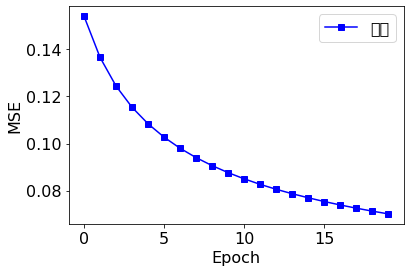

In [110]:
train(epochs=20)